# CS188 Project 2 - Binary Classification Comparative Methods

For this project we're going to attempt a binary classification of a dataset using multiple methods and compare results. 

Our goals for this project will be to introduce you to several of the most common classification techniques, how to perform them and tweek parameters to optimize outcomes, how to produce and interpret results, and compare performance. You will be asked to analyze your findings and provide explanations for observed performance. 

Specifically you will be asked to classify whether a <b>patient is suffering from heart disease</b> based on a host of potential medical factors.

<b><u>DEFINITIONS</b></u>


<b> Binary Classification:</b>
In this case a complex dataset has an added 'target' label with one of two options. Your learning algorithm will try to assign one of these labels to the data.

<b> Supervised Learning:</b>
This data is fully supervised, which means it's been fully labeled and we can trust the veracity of the labeling.

## Background: The Dataset 

For this exercise we will be using a subset of the UCI Heart Disease dataset, leveraging the fourteen most commonly used attributes. All identifying information about the patient has been scrubbed. 

The dataset includes 14 columns. The information provided by each column is as follows:
<ul>
    <li><b>age:</b> Age in years</li>
    <li><b>sex:</b> (1 = male; 0 = female)</li>
    <li><b>cp:</b> Chest pain type (0 = asymptomatic; 1 = atypical angina; 2 = non-anginal pain; 3 = typical angina)</li>
    <li><b>trestbps:</b> Resting blood pressure (in mm Hg on admission to the hospital)</li>
    <li><b>cholserum:</b> Cholestoral in mg/dl</li>
    <li><b>fbs</b> Fasting blood sugar > 120 mg/dl (1 = true; 0 = false)</li>
    <li><b>restecg:</b> Resting electrocardiographic results (0= showing probable or definite left ventricular hypertrophy by Estes' criteria; 1 = normal; 2 = having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV))</li>
    <li><b>thalach:</b> Maximum heart rate achieved</li>
    <li><b>exang:</b> Exercise induced angina (1 = yes; 0 = no)</li>
    <li><b>oldpeakST:</b> Depression induced by exercise relative to rest</li>
    <li><b>slope:</b> The slope of the peak exercise ST segment (0 = downsloping; 1 = flat; 2 = upsloping)</li>
    <li><b>ca:</b> Number of major vessels (0-3) colored by flourosopy</li>
    <li><b>thal:</b> 1 = normal; 2 = fixed defect; 7 = reversable defect</li>
    <li><b><u>Sick:</u></b> Indicates the presence of Heart disease (True = Disease; False = No disease)</li>
</ul>
    


## Loading Essentials and Helper Functions 

In [1]:
#Here are a set of libraries we imported to complete this assignment. 
#Feel free to use these or equivalent libraries for your implementation
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold


from matplotlib import pyplot
import itertools

%matplotlib inline
import random 
  
random.seed(42) 

In [2]:
# Helper function allowing you to export a graph
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [3]:
# Helper function that allows you to draw nicely formatted confusion matrices
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)
    
    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

## [20 Points] Part 1. Load the Data and Analyze

Let's first load our dataset so we'll be able to work with it. (correct the relative path if your notebook is in a different directory than the csv file.)

In [4]:
data = pd.read_csv("heartdisease.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,False
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,False
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,False
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,False
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,False


### Question 1.1 Now that our data is loaded, let's take a closer look at the dataset we're working with. Use the head method to display some of the rows so we can visualize the types of data fields we'll be working with, then use the describe method, along with any additional methods you'd like to call to better help you understand what you're working with and what issues you might face. 

In [5]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000


In [6]:
data.info()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
sick        303 non-null bool
dtypes: bool(1), float64(1), int64(12)
memory usage: 31.2 KB


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
sick        0
dtype: int64

### Question 1.2 Discuss your data preprocessing strategy. Are their any datafield types that are problemmatic and why? Will there be any null values you will have to impute and how do you intend to do so? Finally, for your numeric and categorical features, what if any, additional preprocessing steps will you take on those data elements?

[Use this area to discuss your data processing strategy] 

In [7]:
# The bool type, sick, will need to be changed to an int. The categorical values can be onehotencoded and the numericals 
# will be scaled in the pipeline. The encoding will allow the categorical values to be processed correctly, and the scaling
# will normalize the numerical categories, allowing for more accurate and faster computations. Without scaling, features
# that have different ranges and average magnitudes will be judged similarly, skewing the predictions incorrectly.

### Question 1.3  Before we begin our analysis we need to fix the field(s) that will be problematic. Specifically convert our boolean sick variable into a binary numeric target variable (values of either '0' or '1'), and then drop the original sick datafield from the dataframe.

In [8]:
data.sick = data.sick.astype(int)
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,sick
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,0
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,0
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,0
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,0
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,0


### Question 1.4 Now that we have a feel for the data-types for each of the variables, plot histograms of each field and attempt to ascertain how each variable performs (is it a binary, or limited selection, or does it follow a gradient? (Note: No need to describe each variable, but pick out a few you wish to highlight)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C61775A308>,
      dtype=object)

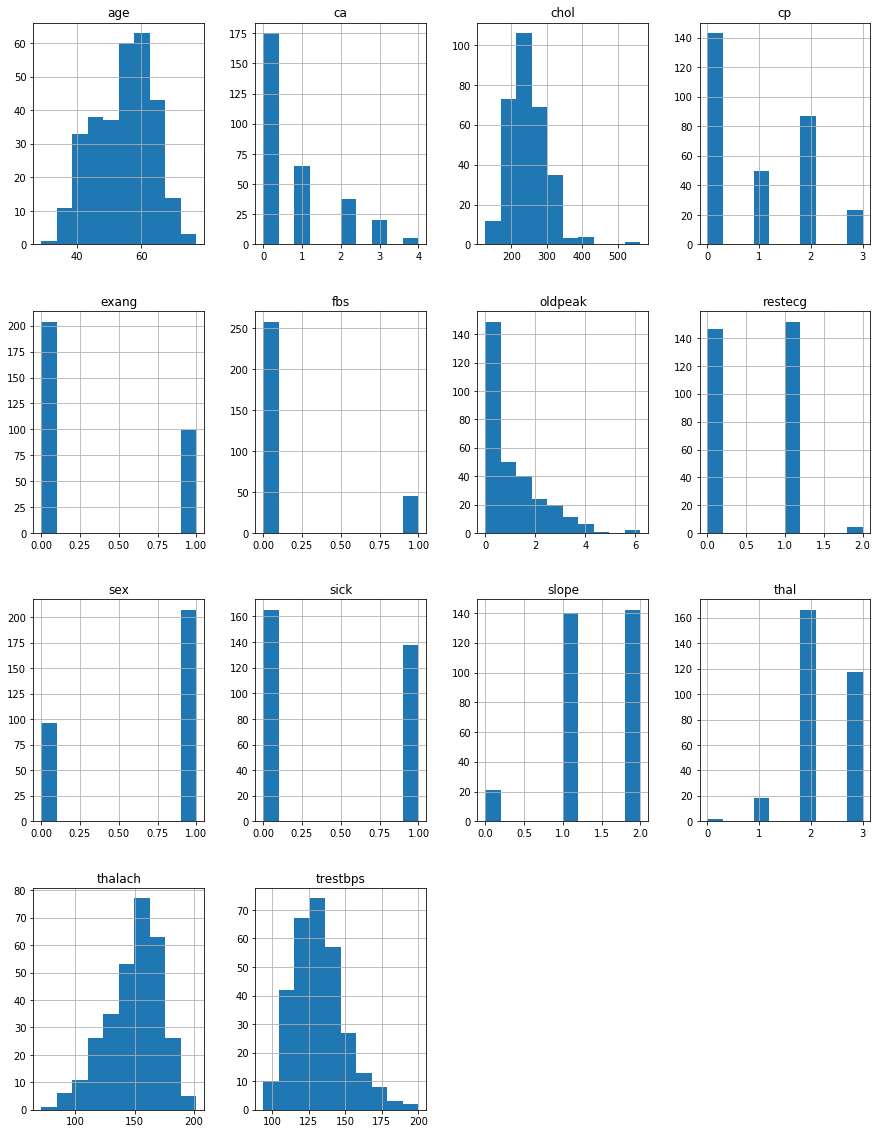

In [9]:
data.hist(figsize=(15,20))

### Question 1.5 We also want to make sure we are dealing with a balanced dataset. In this case, we want to confirm whether or not we have an equitable number of  sick and healthy individuals to ensure that our classifier will have a sufficiently balanced dataset to adequately classify the two. Plot a histogram specifically of the sick target, and conduct a count of the number of sick and healthy individuals and report on the results: 

age                                                       sex  \
      count       mean       std   min   25%   50%   75%   max  count   
sick                                                                    
0     165.0  52.496970  9.550651  29.0  44.0  52.0  59.0  76.0  165.0   
1     138.0  56.601449  7.962082  35.0  52.0  58.0  62.0  77.0  138.0   

                ...   ca        thal                                          \
          mean  ...  75%  max  count      mean       std  min  25%  50%  75%   
sick            ...                                                            
0     0.563636  ...  0.0  4.0  165.0  2.121212  0.465752  0.0  2.0  2.0  2.0   
1     0.826087  ...  2.0  4.0  138.0  2.543478  0.684762  0.0  2.0  3.0  3.0   

           
      max  
sick       
0     3.0  
1     3.0  

[2 rows x 104 columns]

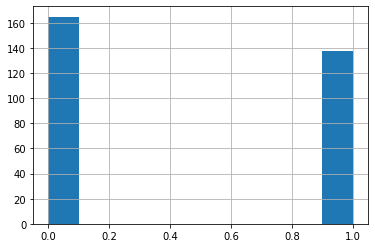

In [10]:
data["sick"].hist()
data.groupby("sick").describe()


[Include description of findings here] 

In [11]:
# There are 165 "healthy" individuals and 138 "sick" individuals within the data set. 

### Question  1.6 Balanced datasets are important to ensure that classifiers train adequately and don't overfit, however arbitrary balancing of a dataset might introduce its own issues. Discuss some of the problems that might arise by artificially balancing a dataset.

[Discuss problem here] 

In [12]:
# It could potentially introduce some additional biases into the model's behavior. It is relatively balanced, and does 
# not require any additional augmentations. 

### Question 1.9 Now that we have our dataframe prepared let's start analyzing our data. For this next question let's look at the correlations of our variables to our target value. First, map out the correlations between the values, and then discuss the relationships you observe. Do some research on the variables to understand why they may relate to the observed corellations. Intuitively, why do you think some variables correlate more highly than others (hint: one possible approach you can use the sns heatmap function to map the corr() method)?

In [13]:
matrix = data.corr()
matrix["sick"].sort_values(ascending=False)

sick        1.000000
exang       0.436757
oldpeak     0.430696
ca          0.391724
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
chol        0.085239
fbs         0.028046
restecg    -0.137230
slope      -0.345877
thalach    -0.421741
cp         -0.433798
Name: sick, dtype: float64

[Discuss correlations here] 

In [14]:
# The factors that are the most correlated with sickness are exercise induced angina, depression induced by exercise relative to rest, 
# and number of arteries colored by fluoroscopy. This makes sense, as angina is a condition that makes breathing difficult. 
# Depression induced by exercise, meaning the patients do not like to exercise. Arteries only come up colored by fluoroscopy
# if they are blocked. Some negative correlations are chest pain, thalach, and restecg. Most of the chest pain entries are 0, 
# possibly affecting its correlation with heart disease in the negative direction. 

## [30 Points] Part 2. Prepare the Data 

Before running our various learning methods, we need to do some additional prep to finalize our data. Specifically you'll have to cut the classification target from the data that will be used to classify, and then you'll have to divide the dataset into training and testing cohorts.

Specifically, we're going to ask you to prepare 2 batches of data: 1. Will simply be the raw numeric data that hasn't gone through any additional pre-processing. The other, will be data that you pipeline using your own selected methods. We will then feed both of these datasets into a classifier to showcase just how important this step can be!

### Question 2.1 Save the target column as a separate array and then drop it from the dataframe. 

In [15]:
labels = data["sick"]
data = data.drop("sick", axis=1)

### Question 2.2 First Create your 'Raw' unprocessed training data by dividing your dataframe into training and testing cohorts, with your training cohort consisting of 70% of your total dataframe (hint: use the train_test_split method) Output the resulting shapes of your training and testing samples to confirm that your split was successful.

In [16]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=.30)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(212, 13)
(91, 13)
(212,)
(91,)


### Question 2.3 Now create a pipeline to conduct any additional preparation of the data you would like. Output the resulting array to ensure it was processed correctly.

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.base import BaseEstimator, TransformerMixin


n_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
     ])
 
numerical_features = ["age", "trestbps", "chol", "thalach", "oldpeak"]
categorical_features = ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

f_pipeline = ColumnTransformer([
    ("num", n_pipeline, numerical_features),
    ("cat", OneHotEncoder(handle_unknown = 'ignore'), categorical_features),
])

data_prepared = f_pipeline.fit_transform(data)
print(data_prepared)

[[ 0.9521966   0.76395577 -0.25633371 ...  1.          0.
   0.        ]
 [-1.91531289 -0.09273778  0.07219949 ...  0.          1.
   0.        ]
 [-1.47415758 -0.09273778 -0.81677269 ...  0.          1.
   0.        ]
 ...
 [ 1.50364073  0.70684287 -1.029353   ...  0.          0.
   1.        ]
 [ 0.29046364 -0.09273778 -2.2275329  ...  0.          0.
   1.        ]
 [ 0.29046364 -0.09273778 -0.19835726 ...  0.          1.
   0.        ]]


### Question 2.4 Now create a separate, processed training data set by dividing your processed dataframe into training and testing cohorts, using the same settings as Q2.2 (REMEMBER TO USE DIFFERENT TRAINING AND TESTING VARIABLES SO AS NOT TO OVERWRITE YOUR PREVIOUS DATA). Output the resulting shapes of your training and testing samples to confirm that your split was successful, and describe what differences there are between your two training datasets.

In [18]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(data_prepared, labels, test_size=.30)

print(x_train2.shape)
print(x_test2.shape)
print(y_train2.shape)
print(y_test2.shape)

(212, 30)
(91, 30)
(212,)
(91,)


[What differences are there between these two datasets?]

In [ ]:
# Once the data is prepared through the pipeline, there is a column created for each unique instance of a feature, 
# which is why there are 30 entries rather than 13 for the x tuples. The prepared dataset has been scaled and categorically
# encoded. 

## [50 Points] Part 3. Learning Methods 

We're finally ready to actually begin classifying our data. To do so we'll employ multiple learning methods and compare result.

### Linear Decision Boundary Methods 

### SVM (Support Vector Machine)

A Support Vector Machine (SVM) is a discriminative classifier formally defined by a separating hyperplane. In other words, given labeled training data (supervised learning), the algorithm outputs an optimal hyperplane which categorizes new examples. In two dimentional space this hyperplane is a line dividing a plane in two parts where in each class lay in either side.

### Question 3.1.1 Implement a Support Vector Machine classifier on your RAW dataset. Review the [SVM Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) for how to implement a model. For this implementation you can simply use the default settings, but set probability = True.

In [19]:
# SVM
svm_raw = SVC(probability=True, gamma='auto')
svm_raw.fit(x_train, y_train)
svm_raw_predict = svm_raw.predict(x_test)

### Question 3.1.2 Report the accuracy, precision, recall, F1 Score, and confusion matrix of the resulting model.

Accuracy:    0.560440
Precision:   0.500000
Recall:      0.025000
F1 Score:    0.047619


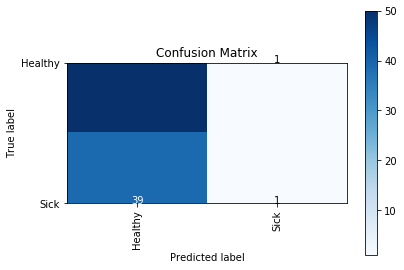

In [20]:
# Print scores for raw SVM
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test, svm_raw_predict)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test, svm_raw_predict)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test, svm_raw_predict)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y_test, svm_raw_predict)))
draw_confusion_matrix(y_test, svm_raw_predict, ['Healthy', 'Sick'])

### Question 3.1.3 Discuss what each measure is reporting, why they are different, and why are each of these measures is significant. Explore why we might choose to evaluate the performance of differing models differently based on these factors. Try to give some specific examples of scenarios in which you might value one of these measures over the others.

[Provide explanation for each measure here] 

In [ ]:
# Accuracy is the number of successfully predicted instances over the total number of instances.

# Precision measures the number of successfully predicted instances divided by the number of successfully 
# predicted instances plus the false positives. The higher precision is, the lower the number of false positives.

# Recall is the same as precision, but looks at the number of false negatives instead of false positives. 

# F1 Score is a weighted average between precision and recall, a wholistic score that accounts for both 
# false positives and false negatives.

### Question 3.1.4 Plot a Receiver Operating Characteristic curve, or ROC curve, and describe what it is and what the results indicate

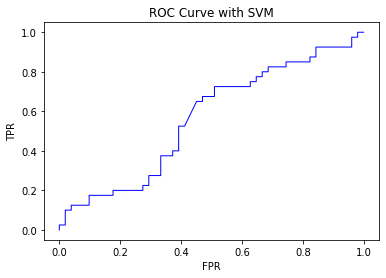

In [21]:
# ROC Curve for raw SVM
svm_raw_score = svm_raw.decision_function(x_test)
fpr_svm_raw, tpr_svm_raw, thresholds_raw = metrics.roc_curve(y_test, svm_raw_score, pos_label=1)

pyplot.figure(1)
pyplot.plot(fpr_svm_raw, tpr_svm_raw, color='blue', lw=1)
pyplot.title("ROC Curve with SVM")
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')
pyplot.show()
auc_score = metrics.roc_auc_score(y_test, svm_raw_predict)
print("The AUC Score for the SVM is: ", auc_score)

[Describe what an ROC Curve is and what the results mean here] 

In [ ]:
# A ROC Curve plots the True Positive Rate (Precision) against the False Positive Rate. 
# It can be used to measure the effectiveness of a particular model on a data set. 
# The more separability the model provides, the less the curves will intersect, thus providing a larger area under the curve.
# The closer the AUC is to 1, the more effective the model is. 

### Question 3.1.5 Rerun, using the exact same settings, only this time use your processed data as inputs. 

In [22]:
svm_processed = SVC(probability=True, gamma='auto')
svm_processed.fit(x_train2, y_train2)
svm_processed_predict = svm_processed.predict(x_test2)

### Question 3.1.6 Report the accuracy, precision, recall, F1 Score, confusion matrix, and plot the ROC Curve of the resulting model.

Accuracy:    0.857143
Precision:   0.868421
Recall:      0.804878
F1 Score:    0.835443


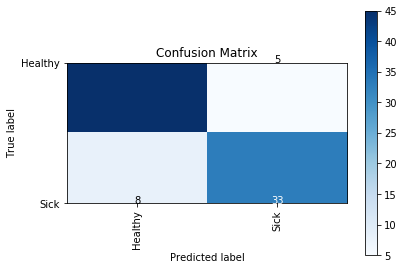

In [23]:
# Print scores for processed SVM
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test2, svm_processed_predict)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test2, svm_processed_predict)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test2, svm_processed_predict)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y_test2, svm_processed_predict)))
draw_confusion_matrix(y_test2, svm_processed_predict, ['Healthy', 'Sick'])

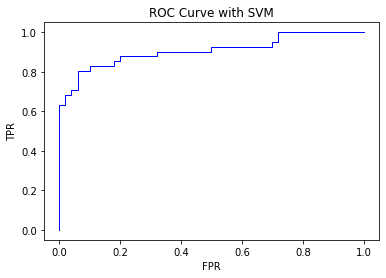

The AUC Score for the SVM is:  0.852439024390244


In [24]:
# ROC Curve for processed data
svm_processed_score = svm_processed.decision_function(x_test2)
fpr_svm_processed, tpr_svm_processed, thresholds_processed = metrics.roc_curve(y_test2, svm_processed_score, pos_label=1)

pyplot.figure()
pyplot.plot(fpr_svm_processed, tpr_svm_processed, color='blue', lw=1)
pyplot.title("ROC Curve with SVM")
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')
pyplot.show()
auc_score2 = metrics.roc_auc_score(y_test2, svm_processed_predict)
print("The AUC Score for the SVM is: ", auc_score2)

### Question 3.1.7 Hopefully you've noticed a dramatic change in performance. Discuss why you think your new data has had such a dramatic impact. 

[Provide explanation here]

In [ ]:
# Because the numerical features in this data set have different ranges and average inputs, the SVM is not able to 
# properly separate the data if it is not scaled. Additionally, the model does not know how to properly interpret 
# the categorical features without onehotencoding them. Once the data is processed, the model is able to make predictions
# much more effectively.

### Question 3.1.8 Rerun your SVM, but now modify your model parameter kernel to equal 'linear'. Again report your Accuracy, Precision, Recall, F1 scores, and Confusion matrix and plot the new ROC curve.  

In [25]:
# SVM
svm_processed2 = SVC(kernel='linear', probability=True, gamma='auto')
svm_processed2.fit(x_train2, y_train2)
svm_processed_predict2 = svm_processed2.predict(x_test2)

Accuracy:    0.857143
Precision:   0.888889
Recall:      0.780488
F1 Score:    0.831169


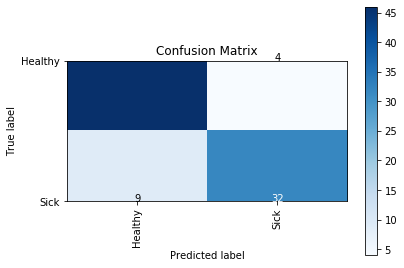

In [26]:
# Print scores for linear SVM 
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test2, svm_processed_predict2)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test2, svm_processed_predict2)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test2, svm_processed_predict2)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y_test2, svm_processed_predict2)))
draw_confusion_matrix(y_test2, svm_processed_predict2, ['Healthy', 'Sick'])

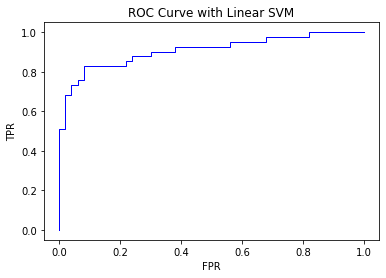

The AUC Score for the Linear SVM is:  0.8502439024390245


In [27]:
# ROC Curve for Linear SVM
svm_processed_score2 = svm_processed2.decision_function(x_test2)
fpr_svm_processed2, tpr_svm_processed2, thresholds_processed2 = metrics.roc_curve(y_test2, svm_processed_score2, pos_label=1)

pyplot.figure()
pyplot.plot(fpr_svm_processed2, tpr_svm_processed2, color='blue', lw=1)
pyplot.title("ROC Curve with Linear SVM")
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')
pyplot.show()
auc_score = metrics.roc_auc_score(y_test2, svm_processed_predict2)
print("The AUC Score for the Linear SVM is: ", auc_score)

### Question 3.1.9 Explain the what the new results you've achieved mean. Read the documentation to understand what you've changed about your model and explain why changing that input parameter might impact the results in the manner you've observed.

[Provide explanation here]

In [28]:
# Linear is faster but less accurate than other mappings like rbf. As most datasets are not perfectly linearly separable, 
# it is difficult to create the most accurate division using a linear kernel. 
# However, after processing this data, it seems to be fairly separable, which is why the rbf mapping did not significantly
# boost performance. An rbf re-maps the data set to a space that has a more optimal decision boundary. 
#Thus, the 'rbf' kernel has a slightly higher AUC score compared to the linear kernel. (0.02 higher) 

### Logistic Regression

Knowing that we're dealing with a linearly configured dataset, let's now try another classifier that's well known for handling linear models: Logistic Regression. Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable.

### Question 3.2.1 Implement a Logistical Regression Classifier. Review the [Logistical Regression Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) for how to implement the model. For this initial model set the solver = 'sag' and max_iter= 10). Report on the same four metrics as the SVM and graph the resulting ROC curve.

In [29]:
# Logistic Regression
log_reg = LogisticRegression(solver='sag', max_iter=10)
log_reg.fit(x_train2, y_train2)
log_reg_predict = log_reg.predict(x_test2)

C:\Users\ethan\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [30]:
# Print scores for Logisitic Regression, max_iter=10
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test2, log_reg_predict)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test2, log_reg_predict)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test2, log_reg_predict)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y_test2, log_reg_predict)))

Accuracy:    0.890110
Precision:   0.918919
Recall:      0.829268
F1 Score:    0.871795


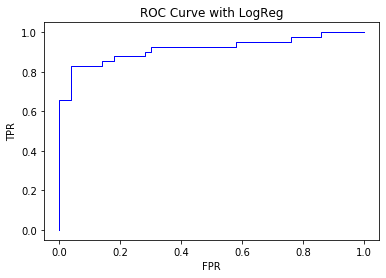

The AUC Score for the Logistic Regression Model is:  0.8846341463414633


In [31]:
log_reg_score = log_reg.decision_function(x_test2)
fpr_log, tpr_log, thresholds_log = metrics.roc_curve(y_test2, log_reg_score, pos_label=1)

pyplot.figure()
pyplot.plot(fpr_log, tpr_log, color='blue', lw=1)
pyplot.title("ROC Curve with LogReg")
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')
pyplot.show()
auc_score = metrics.roc_auc_score(y_test2, log_reg_predict)
print("The AUC Score for the Logistic Regression Model is: ", auc_score)

### Question 3.2.2 Did you notice that when you ran the previous model you got the following warning: "ConvergenceWarning: The max_iter was reached which means the coef_ did not converge". Check the documentation and see if you can implement a fix for this problem, and again report your results.

In [32]:
# Logistic Regression
log_reg2 = LogisticRegression(solver='sag', max_iter=60)
log_reg2.fit(x_train2, y_train2)
log_reg_predict2 = log_reg2.predict(x_test2)

In [33]:
# Print scores for Logisitic Regression, max_iter=100
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test2, log_reg_predict2)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test2, log_reg_predict2)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test2, log_reg_predict2)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y_test2, log_reg_predict2)))

Accuracy:    0.901099
Precision:   0.944444
Recall:      0.829268
F1 Score:    0.883117


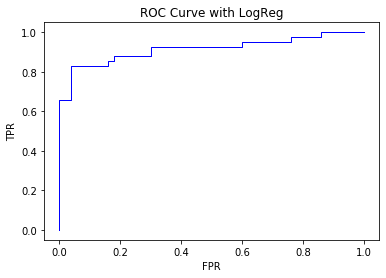

The AUC Score for the Logistic Regression Model is:  0.8946341463414633


In [34]:
log_reg_score2 = log_reg2.decision_function(x_test2)
fpr_log2, tpr_log2, thresholds_log2 = metrics.roc_curve(y_test2, log_reg_score2, pos_label=1)

pyplot.figure()
pyplot.plot(fpr_log2, tpr_log2, color='blue', lw=1)
pyplot.title("ROC Curve with LogReg")
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')
pyplot.show()
auc_score = metrics.roc_auc_score(y_test2, log_reg_predict2)
print("The AUC Score for the Logistic Regression Model is: ", auc_score)

### Question 3.2.3 Explain what you changed, and why that produced an improved outcome. 

[Provide explanation here] 

In [ ]:
# The max iteration for the Logistic Regression model was being reached before convergence was achieved. 
# The solution to this is increase the maximum number of iterations, allowing the model to converge. 
# However, the performance was only improved marginally (0.01) according to the AUC. This could be because 
# Logistic Regression can achieve a high level of performance fairly quickly relative to its full potential. 

### Question 3.2.4 Rerun your logistic classifier, but modify the penalty = 'none', solver='sag' and again report the results.

In [35]:
# Logistic Regression
log_reg3 = LogisticRegression(penalty='none', solver='sag', max_iter=500)
log_reg3.fit(x_train2, y_train2)
log_reg_predict3 = log_reg3.predict(x_test2)

C:\Users\ethan\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [36]:
# Print scores for Logisitic Regression, penalty=none
print("%-12s %f" % ('Accuracy:', metrics.accuracy_score(y_test2, log_reg_predict3)))
print("%-12s %f" % ('Precision:', metrics.precision_score(y_test2, log_reg_predict3)))
print("%-12s %f" % ('Recall:', metrics.recall_score(y_test2, log_reg_predict3)))
print("%-12s %f" % ('F1 Score:', metrics.f1_score(y_test2, log_reg_predict3)))

Accuracy:    0.901099
Precision:   0.944444
Recall:      0.829268
F1 Score:    0.883117


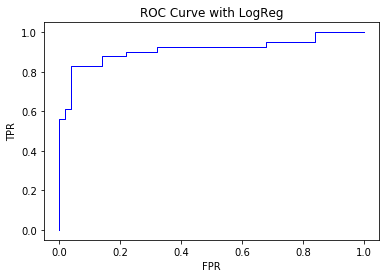

The AUC Score for the Logistic Regression Model is:  0.8946341463414633


In [37]:
log_reg_score3 = log_reg3.decision_function(x_test2)
fpr_log3, tpr_log3, thresholds_log3 = metrics.roc_curve(y_test2, log_reg_score3, pos_label=1)

pyplot.figure()
pyplot.plot(fpr_log3, tpr_log3, color='blue', lw=1)
pyplot.title("ROC Curve with LogReg")
pyplot.xlabel('FPR')
pyplot.ylabel('TPR')
pyplot.show()
auc_score = metrics.roc_auc_score(y_test2, log_reg_predict3)
print("The AUC Score for the Logistic Regression Model is: ", auc_score)

### Question 3.2.5 Explain what what the penalty parameter is doing in this function, what the solver method is, and why this combination likely produced a more optimal outcome. 

[Provide explanation here] 

In [38]:
# It has no change in performance. 
# Like stochastic gradient (SG) methods, the SAG method’s iteration cost is independent of the number of terms in the sum. 
#However, by incorporating a memory of previous gradient values the SAG method achieves a faster convergence rate than
# black-box SG methods. No regularization is applied to the data set , because the 'sag' solver only supports L2 penalties.
# This is possibly because the Logistic Regression model can perform well even before it converges. 

### Question 3.2.6 Both logistic regression and linear SVM are trying to classify data points using a linear decision boundary, then what’s the difference between their ways to find this boundary?

[Provide Answer here:] 

In [39]:
# SVM tries to find the widest possible margin, while LogReg tries to maximize the likelihood that a new data point gets
# the correct classification. SVM miniizes hinge loss, while LogReg minimizes logistic loss, meaning logReg is more sensitive 
# to outliers.

### Clustering Approaches 

Let us now try a different approach to classification using a clustering algorithm. Specifically, we're going to be using K-Nearest Neighbor, one of the most popular clustering approaches. 

### K-Nearest Neighbor  

### Question 3.3.1 Implement a K-Nearest Neighbor algorithm on our data and report the results. For this initial implementation simply use the default settings. Refer to the [KNN Documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) for details on implementation. Report on the accuracy of the resulting model.

In [45]:
# k-Nearest Neighbors algorithm
neighbors = KNeighborsClassifier()
neighbors.fit(x_train2, y_train2)
neighbors_predict = neighbors.predict(x_test2)

ascore = metrics.accuracy_score(y_test2, neighbors_predict)
print("Accuracy Score: ", ascore)

Accuracy Score:  0.8461538461538461


### Question 3.3.2 For clustering algorithms, we use different measures to determine the effectiveness of the model. Specifically here, we're interested in the Homogeneity Score, Completeness Score, V-Measure, Adjusted Rand Score, and Adjusted Mutual Information. Calculate each score (hint review the SKlearn Metrics Clustering documentation for how to implement).

In [44]:
hscore = metrics.homogeneity_score(y_test2, neighbors_predict)
cscore = metrics.completeness_score(y_test2, neighbors_predict)
vscore = metrics.v_measure_score(y_test2, neighbors_predict)
arandscore = metrics.adjusted_rand_score(y_test2, neighbors_predict)
amutscore = metrics.adjusted_mutual_info_score(y_test2, neighbors_predict)
print("Homogeneity Score: {} \n Completeness Score: {} \n V-Measure: {} \n Adjusted Rand Score: {} \n Adjusted Mutual Info: {} \n".format(hscore, cscore, vscore, arandscore, amutscore))

Homogeneity Score: 0.37620925388444065 
 Completeness Score: 0.3791512192913599 
 V-Measure: 0.3776745074289339 
 Adjusted Rand Score: 0.4735103958323643 
 Adjusted Mutual Info: 0.37110042222474654 



C:\Users\ethan\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


### Question 3.3.3 Explain what each score means and interpret the results for this particular model. 

[Input answer here] 

In [ ]:
# Homogeneity checks to see if each cluster only has entries of a single class. A value of 1 would mean the model is 
# perfectly homogenous. This 5-neighbor model is not very homogenous.  

# Completeness is the inverse of homogeneity. It checks to see if each entry of a single class all belong to the same 
# cluster. As completeness is related to homogeneity, this 5-neighbor model similarly has a low completeness score.

# V-Measure is the harmonic mean between homogeneity and completeness. As both have low values, V-measure is also low.

# Adjusted Rand Score checks the similarity between clusters. 

# Adjusted Mutual Info is the measure of mutual dependence between x and y. It is adjusted to account for the fact 
# that larger clusters could have a higher degree of mutual information. 

As we're beginning to see, the input parameters for your model can dramatically impact the performance of the model. How do you know which settings to choose? Studying the models and studying your datasets are critical as they can help you anticipate which models and settings are likely to produce optimal results. However sometimes that isn't enough, and a brute force method is necessary to determine which parameters to use. For this next question we'll attempt to optimize a parameter using a brute force approach. 

### Question 3.3.4 Parameter Optimization.  The KNN Algorithm includes an n_neighbors attribute that specifies how many neighbors to use when developing the cluster. (The default value is 5, which is what your previous model used.) Lets now try n values of: 1, 2, 3, 5, 10, 20, 50, and 100. Run your model for each value and report the 6 measures (5 clustering specific plus accuracy) for each. Report on which n value produces the best accuracy and V-Measure. (HINT leverage python's ability to loop to run through the array and generate results without needing to manually code each iteration).

In [46]:
clusters = [1, 2, 3, 5, 10, 20, 50, 100]
for i in clusters:
    neighbors = KNeighborsClassifier(n_neighbors =i)
    neighbors.fit(x_train2, y_train2)
    neighbors_predict = neighbors.predict(x_test2)
    ascore = metrics.accuracy_score(y_test2, neighbors_predict)
    hscore = metrics.homogeneity_score(y_test2, neighbors_predict)
    cscore = metrics.completeness_score(y_test2, neighbors_predict)
    vscore = metrics.v_measure_score(y_test2, neighbors_predict)
    arandscore = metrics.adjusted_rand_score(y_test2, neighbors_predict)
    amutscore = metrics.adjusted_mutual_info_score(y_test2, neighbors_predict)
    print("Number of Neighbors: {} \n Accuracy Score: {} \n Homogeneity Score: {} \n Completeness Score: {} \n V-Measure: {} \n Adjusted Rand Score: {} \n Adjusted Mutual Info: {} \n".format(i, ascore, hscore, cscore, vscore, arandscore, amutscore))
    

Number of Neighbors: 1 
 Accuracy Score: 0.7142857142857143 
 Homogeneity Score: 0.13106249480889112 
 Completeness Score: 0.1335172792933158 
 V-Measure: 0.1322784992439942 
 Adjusted Rand Score: 0.17462753853419777 
 Adjusted Mutual Info: 0.12394330029337142 

Number of Neighbors: 2 
 Accuracy Score: 0.7582417582417582 
 Homogeneity Score: 0.22100295999912523 
 Completeness Score: 0.2587248857389366 
 V-Measure: 0.23838084898228307 
 Adjusted Rand Score: 0.2587837596136649 
 Adjusted Mutual Info: 0.21458661619903746 

Number of Neighbors: 3 
 Accuracy Score: 0.8351648351648352 
 Homogeneity Score: 0.3500777415855479 
 Completeness Score: 0.35131561039893566 
 V-Measure: 0.3506955836528328 
 Adjusted Rand Score: 0.4432259334132422 
 Adjusted Mutual Info: 0.3447556589975192 

Number of Neighbors: 5 
 Accuracy Score: 0.8461538461538461 
 Homogeneity Score: 0.37620925388444065 
 Completeness Score: 0.3791512192913599 
 V-Measure: 0.3776745074289339 
 Adjusted Rand Score: 0.47351039583236

C:\Users\ethan\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\ethan\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\ethan\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
C:\Users\ethan\Anaconda3\lib\site-packages\sklearn\metrics\cluster\supervised.py:746: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use a

[Describe optimal results here]

In [ ]:
# 20 Neighbors has the best performance in terms of accuracy and v-measure. It also has the highest degree of homogeneity 
# and completeness, meaning that the partitions for each cluster are the most effective relative to the other iterations. 

### Question 3.3.5 When are clustering algorithms most effective, and what do you think  explains the comparative results we achieved?  

[Input answer here] 

In [ ]:
# Clustering algorithms are useful when there are distinct classifications to be made within a dataset. 
# With a high degree of inter-subject similarities, it is beneficial to cluster the data into clusters containing 
# items that are virtually indistinguishable from each other. As there are only two distinct groups in this dataset,
# clustering will not produce the most optimal results. There are many nuanced factors that can contribute to an individual's
# health. As clustering evaluates the data entries based on their similarity to each other, it is not advantageous 
# in something as nuanced as heart disease. 

# Up to a certain threshold, there is a benefit to increasing the number of neighbors. As more comparisons are made for each
# partition, the model is more effectively able to separate the data. However, this dataset only has 200 entries. 
# Thus, increasing the value of K to 50 or 100 (respectively around 1/4 and 1/2 of the entire data set) 
# actually decrease the model's effectiveness. 